<a href="https://colab.research.google.com/github/morganLantrade/Projets_machine_learning/blob/main/projet_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP : Multi-Layer Perceptron pour distinguer des chats de chiens.

##### Lantrade morgan & Couderc-Lafont Enguerran

#### Importations

In [1]:
!pip install h5py
from utilities import *
import sklearn
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.5 MB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/opt/SageMath/local/bin/python3 -m pip install --upgrade pip' command.


### Fonctions coût 

$$\begin{alignat}{2} L_{MSE}=& \frac{1}{m}.\sum_{k=1}^{m} (y_k-a_k)^2\\
L_{log\_loss}=& -\frac{1}{m}.\sum_{k=1}^{m} y_{k}.ln(a_{k})+(1-y_k).ln(1-a_k)\\
\end{alignat}$$

### Dérivées coût

$$\begin{alignat}{2} 
\frac{\partial L_{MSE}}{\partial a_k}=& \frac{2}{m}.\sum_{k=1}^{m} (a_k-y_k)\\
\frac{\partial L_{log\_loss}}{\partial a_k} =& \frac{1}{m}.\sum_{k=1}^m \frac{a_k-y_k}{a_k(1-a_k)})\\
\end{alignat}$$

### Formes de nos données vectorisées pour une couche l:
- m échantillons 
- $n^{[l-1]}$ variables  en entrée 
- $n^{[l]}$ en sortie 

$$\begin{alignat}{2} A^{[0]}= X = & \underbrace{\begin{bmatrix}
x_{1,1} & x_{1,2}&...& x_{1,m}\\
... &  ...&   ...&   ...&\\
x_{n^{[0]},1} & x_{n^{[0]},2}&...& x_{n^{[0]},m}\\
\end{bmatrix}}_{(n^{[0]},m)}\\
Y = & \underbrace{\begin{bmatrix}
y_{1} & y_{2} &... &y_{m}\end{bmatrix}}_{(1,m)}\\
W^{[l]} = & \underbrace{\begin{bmatrix}w^{[l]}_{1,1} & w^{[l]}_{1,2} &... &w^{[l]}_{1,n^{[l-1]}}\\
... & ... &... &... \\
w^{[l]}_{n^{[l]},1} & w^{[l]}_{n^{[l]},2} &... &w^{[l]}_{n^{[l]},n^{[l-1]}}\\
\end{bmatrix}}_{(n^{[l]},n^{[l-1]})} & B^{[l]}= \underbrace{\begin{bmatrix}
b^{[l]}_{1}\\
...\\
b^{[l]}_{n^{[l]}}\end{bmatrix}}_{(n^{[l]},1)}
\end{alignat}$$

### Forward propagation 

$$
\forall l \in \{1,...,L\} : couches\\
\forall j \in \{1,...,n^{[L]}\} : neurones\\
\forall k \in \{1,...,m\} : échantillons
$$ 

$$\begin{alignat}{2} z^{[l]}_{jk} = & \sum_{i=1}^{n^{[l-1]}} w^{[l]}_{ji}.a^{[l-1]}_{ik} + b_j^{[l]}\\
\newline
\underbrace{Z}_{(n^{[l]},m)}^{[l]}  = & \begin{bmatrix}
\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{1,i}.\color{green}a^{[l-1]}_{i,1} + \color{blue}b_1^{[l]} &, &\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{1,i}.\color{green}a^{[l-1]}_{i,2} + \color{blue}b_1^{[l]} &, &... &, &\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{1,i}.\color{green}a^{[l-1]}_{im} + \color{blue}b_1^{[l]}\\
... &,  &... &, &... &,  & ...\\
\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{n^{[l]},i}.\color{green}a^{[l-1]}_{i,1} + \color{blue}b^{[l]}_{n^{[l]}} &, &\sum_{i=1}^{n^{[l-1]}}\color{red}w^{[l]}_{n^{[l]},i}.\color{green}a^{[l-1]}_{i,2} + \color{blue}b^{[l]}_{n^{[l]}} &, &... &, &\sum_{i=1}^{n^{[l-1]}} \color{red}w^{[l]}_{n^{[l]},i}.\color{green}a^{[l-1]}_{i,m} + \color{blue}b^{[l]}_{n^{[l]}}\\
\end{bmatrix}\\
\newline
\underbrace{Z}_{(n^{[l]},m)}^{[l]} = &\color{red}{\underbrace{{\begin{bmatrix}w^{[l]}_{1,1} & w^{[l]}_{1,2} &{...} &w^{[l]}_{1,n^{[l-1]}}\\
... & ... &... &... \\
w^{[l]}_{n^{[l]},1} & w^{[l]}_{n^{[l]},2} &{...} &w^{[l]}_{n^{[l]},n^{[l-1]}} \\
\end{bmatrix}}}_{(n^{[l]},n^{[l-1]})}}.\color{green}{\underbrace{\begin{bmatrix}
a^{[l-1]}_{1,1} & a^{[l-1]}_{1,2}&...& a^{[l-1]}_{1,m}\\
... &  ...&   ...&   ...&\\
a^{[l-1]}_{n^{[l-1]},1} & a^{[l-1]}_{n^{[l-1]},2}&...& a^{[l-1]}_{n^{[l-1]},m}\\
\end{bmatrix}}_{(n^{[l-1]},m)}}+\color{blue}{\underbrace{\begin{bmatrix}
b^{[l]}_1& ...& b^{[l]}_1\\
{...}& ...& ...\\
b^{[l]}_{n^{[l]}}& ...& b^{[l]}_{n^{[l]}} \end{bmatrix}}_{(n^{[l-1]},m)}}\\
\underbrace{Z}_{(n^{[l]},m)}^{[l]} = & W^{[l]}.A^{[l-1]} + B^{[l]} \\
\newline
\underbrace{A}^{[l]}_{(n^{[l]},m)}= &\frac{1}{1+e^{-Z^{[l]}}}
\end{alignat}$$

<div class="alert alert-block alert-success">
On obtient les activations où les lignes correspondent aux neurones et colonnes aux échantillons.</div>


<div class="alert alert-block alert-info">
<b>Remarque 1:</b> Le produit matriciel nous permet de faire la somme de 1 a m pour obtenir la matrice Z.
    
<b>Remarque 2:</b> On peut réduire B à une seule colonne car numpy permet d'additionner toute une ligne selon un une valeur.</div>

### Backward propagation à L couches
- activation : <span style="color:green"> **sigmoide** </span> 
- cost : <span style="color:purple"> **MSE** </span>
- cost : <span style="color:brown"> **log_loss** </span>

#### Calcul des dérivées de la derniere couche L : 


$$
\begin{alignat}{5}
\require{cancel}
&\underbrace{\frac{\partial L}{\partial W^{[L]}}}_{(n^{[L]},n^{[L-1]})} &= &\color{red}{\frac{\partial L}{\partial A^{[L]}} }*\color{green}{\frac{\partial A^{[L]}}{\partial Z^{[L]}}}*\color{blue}{\frac{\partial Z^{[L]}}{\partial W^{[L]}}}\\
&\underbrace{\color{blue}{\frac{\partial Z^{[L]}}{\partial W^{[L]}}}}_{(n^{[L-1]},m)} &= & A^{[L-1]}\\
&\underbrace{\color{blue}{\frac{\partial Z^{[L]}}{\partial B^{[L]}}}}_{(n^{[L-1]},1)} &= & 1\\
&\color{red}{\frac{\partial L_{MSE}}{\partial a_{ji}^{[L]}}}&= & \frac{2}{m}*\sum_{i=1}^{m} (a_{ji}-y_i)\\
&\color{red}{\frac{\partial L_{log\_loss}}{\partial a_{ji}^{[L]}}}&= & \frac{1}{m}*\sum_{i=1}^m \frac{(a_{ji}-y_i)}{a_{ji}(1-a_{ji})}\\
&\color{green}{\underbrace{\frac{\partial a^{[L]}_{ji}}{\partial z^{[L]}}}_{(n^{[L]},m)}}&= & a^{[L]}_{ji}*(1-a^{[L]}_{ji})\\
&\color{purple}{\frac{\partial L_{MSE}}{\partial {z_{ji}}^{[L]}}}& =&\color{red}{\frac{\partial L}{{\partial a^{[L]}_{ji}}} }*\color{green}{\frac{{\partial a^{[L]}_{ji}}}{\partial {z_{ji}}^{[L]}}}= \color{red}{\frac{2}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)*\color{green}{a^{[L]}_{ji}*(1-a^{[L]}_{ji})}}\\
&\color{brown}{\frac{\partial L_{log\_loss}}{\partial {z_{ji}}^{[L]}}}& =&\color{red}{\frac{\partial L}{\cancel{\partial a^{[L]}_{ji}}} }*\color{green}{\frac{\cancel{\partial a^{[L]}_{ji}}}{\partial {z_{ji}}^{[L]}}}= \color{brown}{\frac{1}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)}\\
\newline
\newline
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial W^{[L]}}}_{(n^{[L]},n^{[L-1]})}} &= &\boxed{\color{red}{\underbrace{\frac{2}{m}*(A^{[L]}-y)*\color{green}A^{\color{green}[\color{green}L\color{green}]}\color{green}*\color{green}(\color{green}1\color{green}-\color{green}A^{\color{green}[\color{green}L\color{green}]}\color{green})}_{(n^{[L]},m)}} .\color{blue}{\underbrace{{}^TA^{[L-1]}}_{(m,n^{[L-1]})}}}\\
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial B^{[L]}}}_{(n^{[L]},1)}} &= &\boxed{\color{red}{\frac{2}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)*\color{green}{a^{[L]}_{ji}*(1-a^{[L]}_{ji})}}}\\
\newline
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial W^{[L]}}}_{(n^{[L]},n^{[L-1]})}} &= &\boxed{\color{brown}{\underbrace{\frac{1}{m}*(A^{[L]}-y)}_{(n^{[L]},m)}} .\color{blue}{\underbrace{{}^TA^{[L-1]}}_{(m,n^{[L-1]})}}}\\
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial B^{[L]}}}_{(n^{[L]},1)}} &= &\boxed{\color{brown}{\frac{1}{m}*\sum_{i=1}^m (a^{[L]}_{ji}-y_i)}}\\
\end{alignat}$$

<div class="alert alert-block alert-info">
<b>Même principe que la propagation avant :</b>
    
Le produit matriciel permet de vectoriser la somme de 1 à m .

Pour les gradients de B, numpy nous permet de faire la somme de chaque ligne. (axis=1)</div>



#### Calcul des dérivées de la couche l

$$
\begin{alignat}{5}
\require{cancel}
&{\underbrace{\frac{\partial L}{\partial W^{[l]}}}_{(n^{[l]},n^{[l-1]})}} &= &{\frac{\partial L}{\cancel{\partial Z^{[L]}}}}*{\cancel{\frac{\partial Z^{[L]}}{\partial A^{[L-1]}}}}*{\cancel{\frac{\partial A^{[L-1]}}{\partial Z^{[L-1]}}}}*...*{\frac{\cancel{\partial A^{[l+2]}}}{\partial Z^{[l+1]}}}* \color{gray}{\frac{\partial Z^{[l+1]}}{\partial A^{[l]}}}* \color{green}{\frac{\partial A^{[l]}}{\partial Z^{[l]}}}*\color{blue}{\frac{\partial Z^{[l]}}{\partial W^{[l]}}}  \\
&{\frac{\partial L}{\partial Z^{[l]}}}& = &{\frac{\partial L}{\partial Z^{[l+1]}}}* \color{gray}{\frac{\partial Z^{[l+1]}}{\partial A^{[l]}}} *  \color{green}{\frac{\partial A^{[l]}}{\partial Z^{[l]}}} \\
& &=&\underbrace{\underbrace{\color{gray}{{}^TW^{[l+1]}}}_{(n^{[l]},n^{[l+1]})}.\underbrace{{\frac{\partial L}{\partial Z^{[l+1]}}}}_{(n^{[l+1]},m)}* \underbrace{\color{green}{A^{[l]}*(1- A^{[l]})}}_{(n^{[l]},m)}}_{(n^{[l]},m)}\\
\newline
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial W^{[l]}}}_{(n^{[l]},n^{[l-1]})}} &= &\boxed{\underbrace{\color{gray}{{}^TW^{[l+1]}}}_{(n^{[l]},n^{[l+1]})}.\underbrace{\color{purple}{\frac{\partial L_{MSE}}{\partial Z^{[l+1]}}}}_{(n^{[l+1]},m)}* \underbrace{\color{green}{A^{[l]}*(1- A^{[l]})}}_{(n^{[l]},m)}.\color{blue}{\underbrace{{}^TA^{[l-1]}}_{(m,n^{[l-1]})}}}\\
&\color{purple}{\underbrace{\frac{\partial L_{MSE}}{\partial B^{[l]}}}_{(n^{[l]},1)}} &=  &\boxed{\color{purple}{\sum _{k=0}^{m} \frac{\partial L_{MSE}}{\partial Z^{[l]}}}} \\
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial W^{[l]}}}_{(n^{[l]},n^{[l-1]})}} &= &\boxed{\underbrace{\color{gray}{{}^TW^{[l+1]}}}_{(n^{[l]},n^{[l+1]})}.\underbrace{\color{brown}{\frac{\partial L_{log\_loss}}{\partial Z^{[l+1]}}}}_{(n^{[l+1]},m)}* \underbrace{\color{green}{A^{[l]}*(1- A^{[l]})}}_{(n^{[l]},m)}.\color{blue}{\underbrace{{}^TA^{[l-1]}}_{(m,n^{[l-1]})}}}\\
&\color{brown}{\underbrace{\frac{\partial L_{log\_loss}}{\partial B^{[l]}}}_{(n^{[l]},1)}} &=  &\boxed{\color{brown}{\sum _{k=0}^{m} \frac{\partial L_{log\_loss}}{\partial Z^{[l]}}}} \\
\end{alignat}$$

<div class="alert alert-block alert-success">
Nous avons réussi à exprimer les gradients de la couche L-1 par ceux de la couche L, nous pouvons donc maintenant récursivement
remonter jusqu a la couche 0.
Nous avons maintenant toutes les formules pour implémenter notre MLP avec une activation : sigmoïde et un cout : log_loss ou MSE.</div>


<a href="https://github.com/morganLantrade/Projets_machine_learning/blob/main/projet_mlp/MLP.py" target="_blank"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="Open In Colab" width="70" height="70" style="float:left; padding: 10px; " ></a>
### Implémentation du modèle sur github

In [2]:
from MLP import *

# Classification chats et chiens

#### Chargement des données 

In [3]:
Xa, ya, Xt, yt = load_data() 

#### Quelques photos

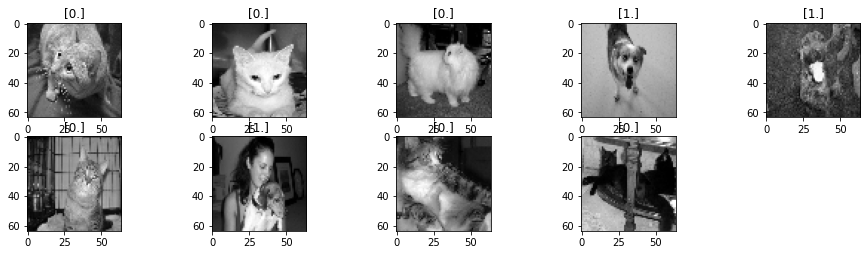

In [4]:
def afficherPhoto(Xa,ya,n=9):
    plt.figure(figsize=(16,8))
    for i in range(1,n+1):
        plt.subplot(4,5,i)
        plt.imshow(Xa[i],cmap='gray')
        plt.title(ya[i])
    plt.show()
afficherPhoto(Xa,ya)

#### Applatissement des images

In [5]:
print("Avant:")
print(Xa.shape)
print(Xt.shape)
Xa=Xa.reshape(Xa.shape[0],Xa.shape[1]*Xa.shape[2])
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1]*Xt.shape[2])
ya=ya
yt=yt
print("Après:")
print(Xa.shape)
print(Xt.shape)

Avant:
(1000, 64, 64)
(200, 64, 64)
Après:
(1000, 4096)
(200, 4096)


#### Normalisation des données

In [6]:
def min_max_normalize(Xa,Xt): #ici ce sera équivalent à diviser X par 255
    return (Xa-np.min(Xa))/(np.max(Xa)-np.min(Xa)),(Xt-np.min(Xa))/(np.max(Xa)-np.min(Xa))

def load_reshape():
    '''Load les données ,reshape et normalise'''
    Xa, ya, Xt, yt = load_data()
    Xa=Xa.reshape(Xa.shape[0],Xa.shape[1]*Xa.shape[2])
    Xt=Xt.reshape(Xt.shape[0],Xt.shape[1]*Xt.shape[2])
    return Xa,ya,Xt,yt

Xa,ya,Xt,yt=load_reshape()
Xa,Xt=min_max_normalize(Xa,Xt)
print(Xa.shape,Xt.shape)
print(Xa.max(),Xa.min())


(1000, 4096) (200, 4096)
1.0 0.0


## Perceptron : un neurone

### MSE

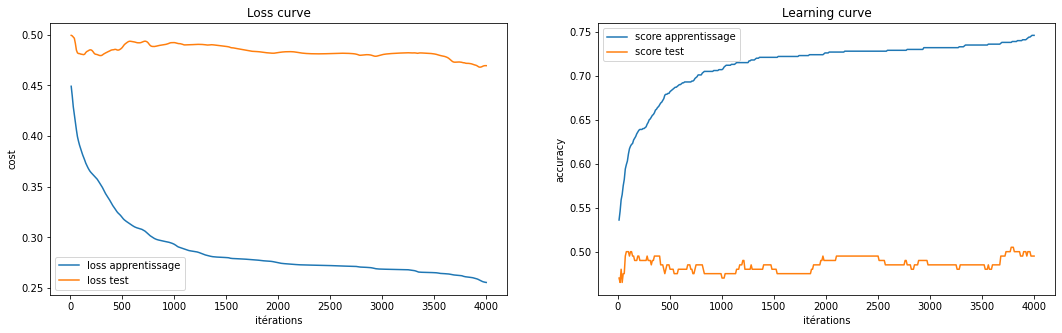

In [7]:
mlp=MLP(hidden_layers=[],activation='logistic',cost='MSE',learning_rate=0.2,max_iter=4000)
mlp.fit_show(Xa,ya,Xt,yt)

### Log_loss

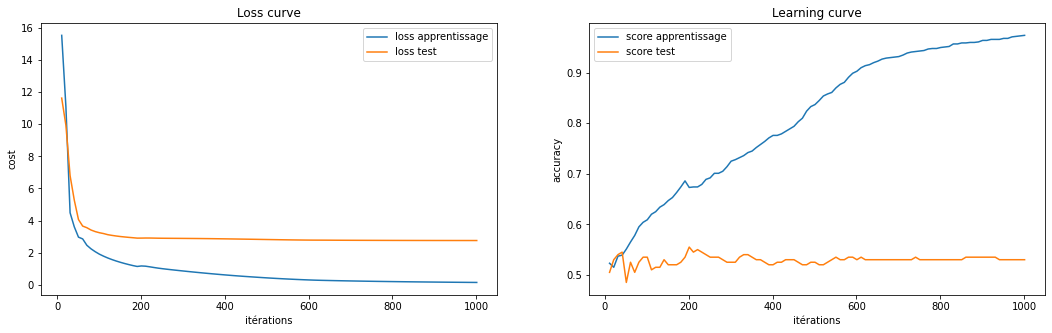

In [8]:
mlp=MLP(hidden_layers=[],activation='logistic',cost='log_loss',learning_rate=0.05,max_iter=1000)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-info">
On remarque que notre courbe de de coüt continue de descendre et celle de notre score d'apprentissage de monter mais les courbes de test n'évoluent pas : <b>Overfitting</b></div>

<div class="alert alert-block alert-danger">
Problèmes:
    
- On n'a pas assez de données pour le nombre de caractéristiques (Fléau de la dimension)
    
- Modèle trop simple : 1 neurone et 0 couche cachée</div>

<div class="alert alert-block alert-success">
Solutions:

- Il faut augmenter le nombre de données.

- Il faut réduire le nombre de variables : <b>Analyse en composantes principales</b>

- Augmenter le nombre de neurones pour obtenir un réseau de neurones multicouche : <b>MLP</b></div>

# Réduction du nombre de variables par analyse en composantes principales

- 1 Standardiser nos données

- 2 Determiner la matrice de corrélation C

- 3 Trouver les valeurs propres et les vecteurs propres de la matrice symétrique C

- 4 Classer les valeurs propres par ordre décroissante ( automatique )

- 5 Conserver les k premiers vecteurs selon l'inertie souhaitée

- 6 Projection des nos données par la matrice de passage 


<a href="https://github.com/morganLantrade/Projets_machine_learning/blob/main/projet_mlp/PCA.py" target="_blank"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="Open In Colab" width="70" height="70" style="float:left; padding: 10px; " ></a>
### Implémentation du modèle sur github

In [9]:
from PCA import *

In [10]:
Xa,ya,Xt,yt=load_reshape()
X=np.concatenate((Xa,Xt),axis=0)
y=np.concatenate((ya,yt),axis=0)
pca=PCA(X) #construit la matrice de PCA.transform et de PCA.inv_transform

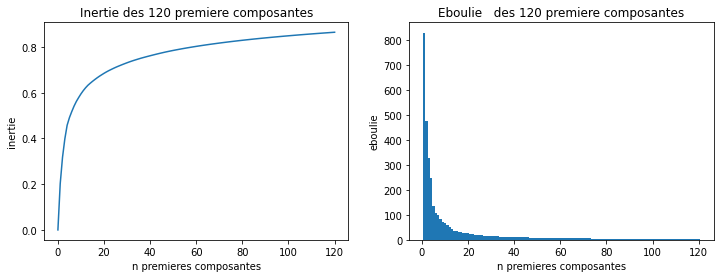

In [11]:
pca.show(120)

<div class="alert alert-block alert-info">
Essayons de réduire à <b>100</b> variables avec une inertie proche de 80% </div>

In [12]:
n=100
images_transform=pca.transform(n)
print(images_transform.shape)

new_images=pca.inv_transform(images_transform).reshape(X.shape[0],64,64) #shape d'origine
print(new_images.shape)

(1200, 100)
(1200, 64, 64)


#### Comparons les nouvelles images obtenues

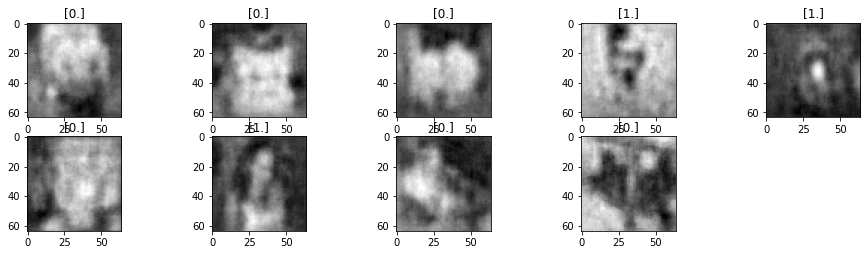

In [13]:
afficherPhoto(new_images,ya)

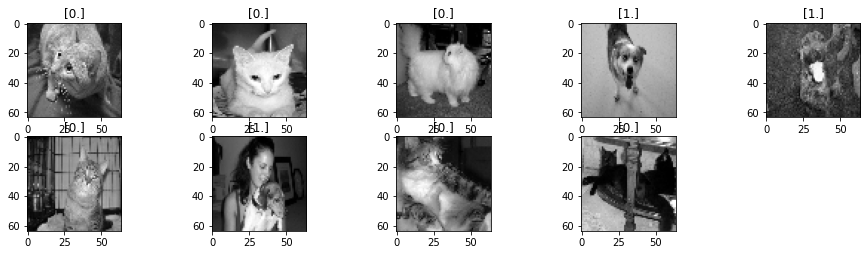

In [14]:
Xa, ya, Xt, yt = load_data() 
afficherPhoto(Xa,ya)

<div class="alert alert-block alert-success">
Le résultat semble être satisfaisant, on reconnait la forme des photos avec seulement 100 variables.</div>

# Essayons après la réduction

In [15]:
random_state=42

In [16]:
Xa,Xt,ya,yt = train_test_split(images_transform,y,test_size=0.166,shuffle=True,random_state=random_state)
print(Xa.shape,ya.shape)
print(Xt.shape,yt.shape)

(1000, 100) (1000, 1)
(200, 100) (200, 1)


### MLP : une couche cachée

#### Sigmoide MSE 32 neurones

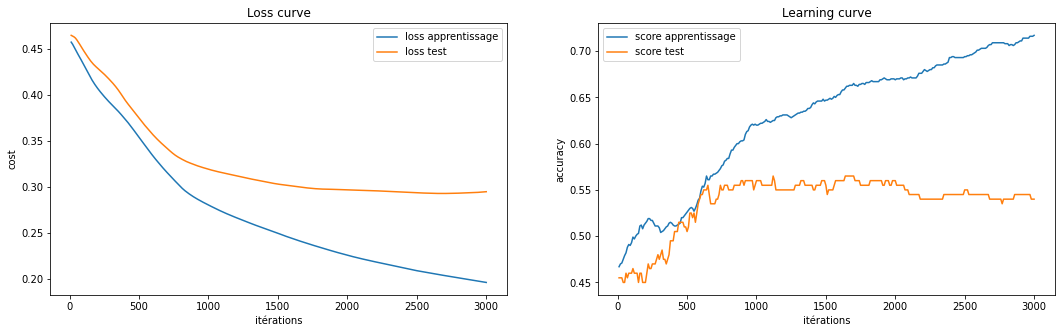

In [17]:
mlp=MLP(hidden_layers=[32],activation='logistic',cost='MSE',learning_rate=0.01,max_iter=3000,random_state=random_state)
mlp.fit_show(Xa,ya,Xt,yt)

#### Sigmoide Log_loss 32 neurones

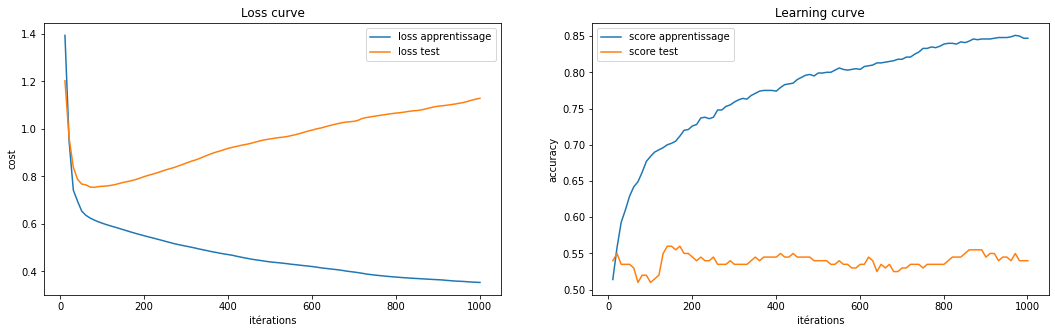

In [18]:
mlp=MLP(hidden_layers=[32],activation='logistic',cost='log_loss',learning_rate=0.1,max_iter=1000,random_state=random_state)
mlp.fit_show(Xa,ya,Xt,yt)

#### log_loss relu 16 neurones

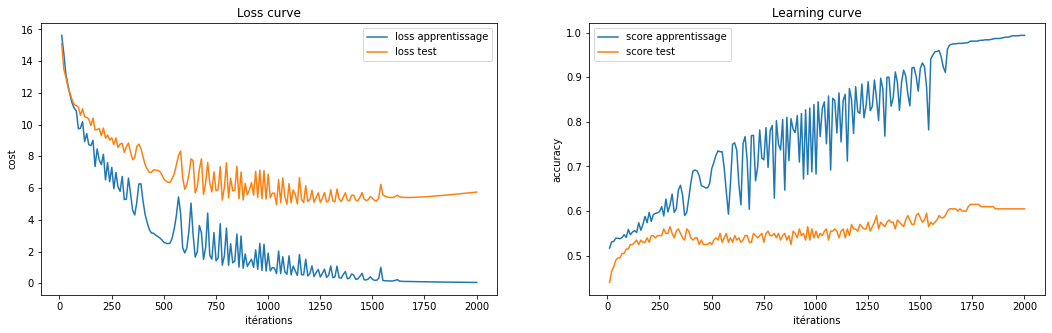

In [19]:
mlp=MLP(hidden_layers=[16],activation='relu',cost='log_loss',learning_rate=0.05,max_iter=2000,random_state=random_state,momentum=0)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-info">
Il y a toujours de l'<b>Overfitting</b> mais le score avec relu log_loss s'approche de 0.6</div>

#### MSE relu 16 neurones

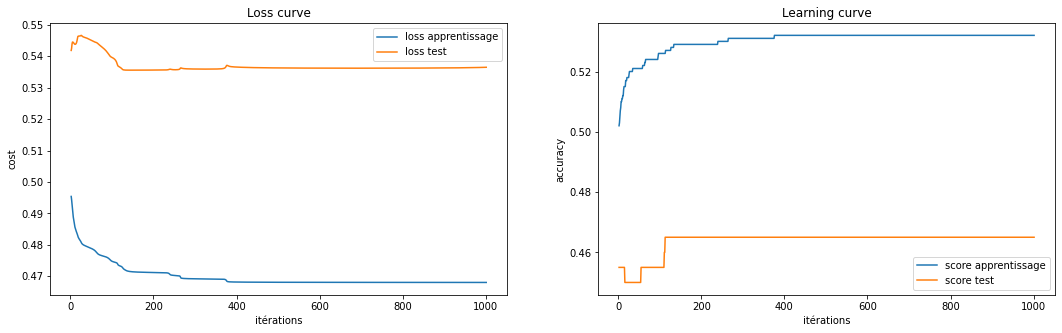

In [20]:
mlp=MLP(hidden_layers=[16],activation='relu',cost='MSE',learning_rate=0.05,max_iter=1000,random_state=random_state,momentum=0)
mlp.fit_show(Xa,ya,Xt,yt,1)

### MLP : deux couches cachées

#### Sigmoide Log_loss 16x16

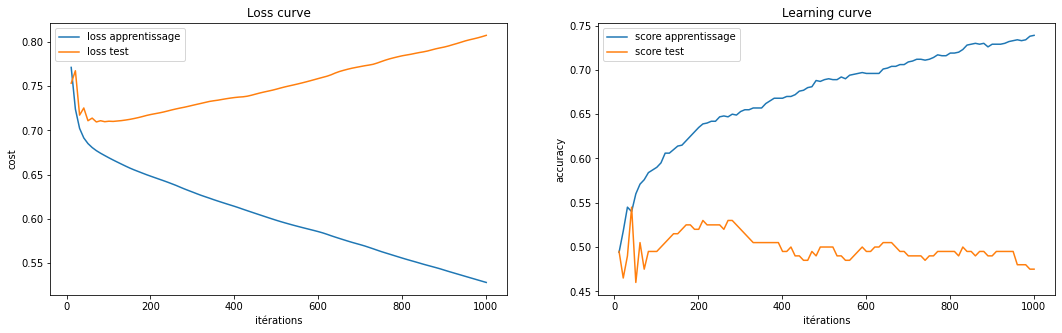

In [21]:
mlp=MLP(hidden_layers=[16,16],activation='logistic',cost='log_loss',learning_rate=0.05,max_iter=1000,random_state=random_state)
mlp.fit_show(Xa,ya,Xt,yt)

#### Sigmoide MSE 32x32

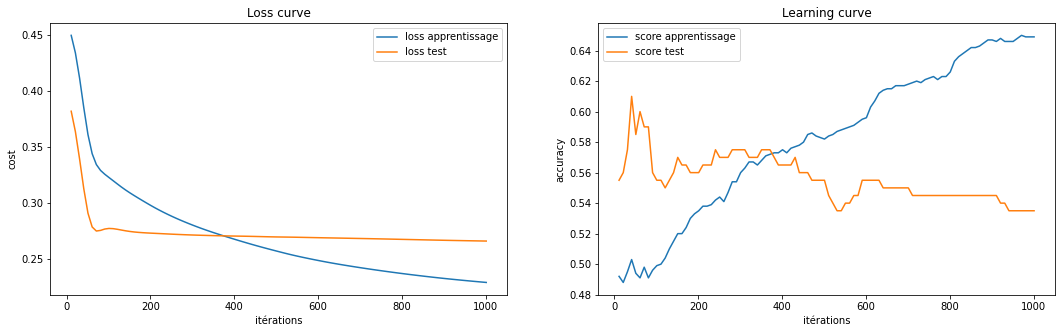

In [22]:
mlp=MLP(hidden_layers=[32,32],activation='logistic',cost='MSE',learning_rate=0.01,max_iter=1000,random_state=random_state)
mlp.fit_show(Xa,ya,Xt,yt)

#### Relu log_loss 32x32

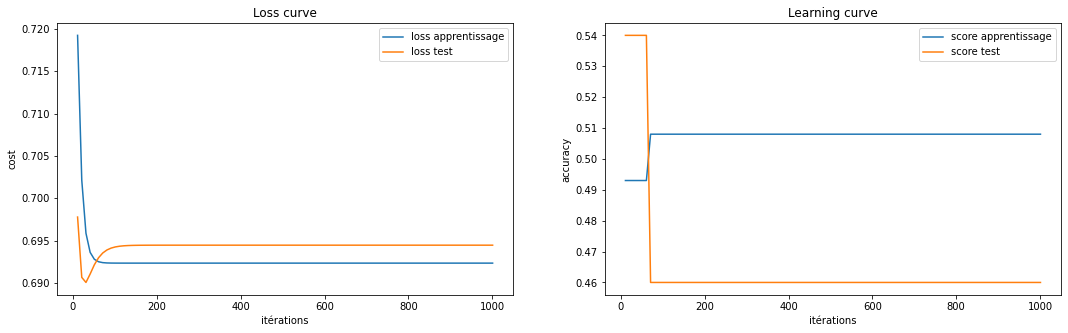

In [23]:
mlp=MLP(hidden_layers=[128,128],activation='relu',cost='log_loss',learning_rate=0.2,max_iter=1000,random_state=random_state,momentum=0)
mlp.fit_show(Xa,ya,Xt,yt)

#### Relu MSE 32x32

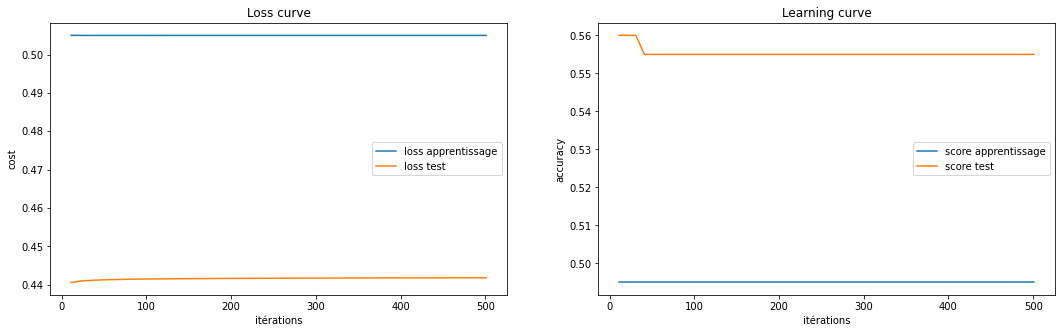

In [24]:
mlp=MLP(hidden_layers=[32,32],activation='relu',cost='MSE',learning_rate=0.01,max_iter=500,random_state=random_state,momentum=0)
mlp.fit_show(Xa,ya,Xt,yt)

In [25]:
for gradients in mlp.gradients_W:
    print(np.max(gradients))

3.735649241526075e-05
1.9766740348849623e-05
2.9061436251353488e-05


<div class="alert alert-block alert-warning">
On remarque que la fonction <b> Relu </b> est plus rapide mais peut stopper l'apprentissage, pour plus d'info : 
<a href="https://deeplylearning.fr/cours-theoriques-deep-learning/fonction-dactivation/" target="_blank" >Explications des différentes versions de Relu</a>

Jouer avec différents random_state et nombre de neurones permet de voir le problème.</div>

### MLP : trois couches cachées

#### Sigmoide Log_loss 8x8x8

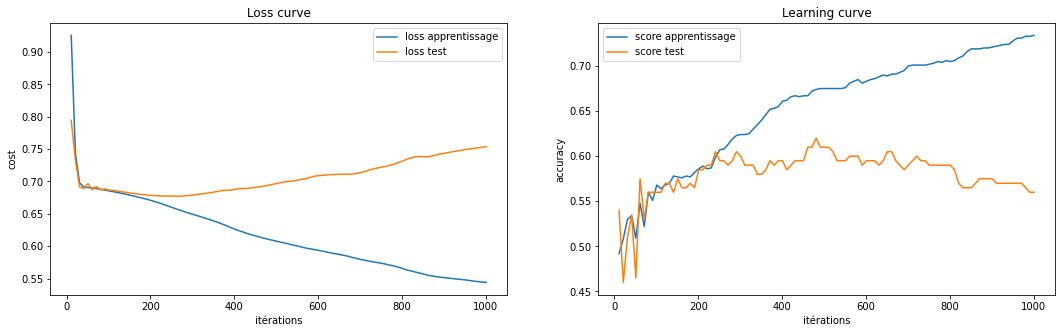

In [26]:
mlp=MLP(hidden_layers=[8,8,8],activation='logistic',cost='log_loss',learning_rate=0.12,max_iter=1000,random_state=random_state)
mlp.fit_show(Xa,ya,Xt,yt)

#### Sigmoide MSE 16x16x16x16

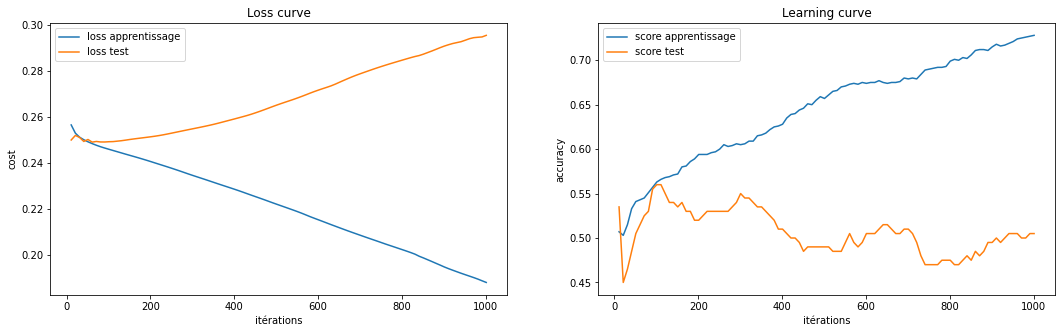

In [27]:
mlp=MLP(hidden_layers=[16,16,16,16],activation='logistic',cost='MSE',learning_rate=0.1,max_iter=1000,random_state=random_state)
mlp.fit_show(Xa,ya,Xt,yt)

<div class="alert alert-block alert-success">
Le modèle reste très innéficace mais il y a une amélioration au niveau de l apprentissage, on voit que le modèle apprend : <b>le score de test augmente au début </b>.</div>

## Avec scikit-learn : 

### Cherchons une optimisation des hyperparamètres

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

#On reforme les données standardisées
Xa, ya, Xt, yt = load_reshape() 
X=np.concatenate((Xa,Xt),axis=0)
y=np.concatenate((ya,yt),axis=0).reshape(X.shape[0])
X=StandardScaler().fit_transform(X)

#on essaye d'optimisiser pca -> mlp en utilisant Pipeline de sklearn 
mlp=MLPClassifier(max_iter=500)
pca=PCA()
pipeline=Pipeline(steps=[('pca',pca),('mlp',mlp)])

#choix des espaces des hyperparamètres
n_components= [20,40,60,80,100]
hidden_layer_sizes1=[(64,64,64),(32,32),(16,16,16,),(16,16,),(16,),(32,),(128,128),(512,)]
hidden_layer_sizes2=[(20,20,20,2),(20,64,20,),(1020,1024,),(1024,)]

parameter_space = dict(
    pca__n_components=n_components,
    mlp__hidden_layer_sizes= hidden_layer_sizes2,
    mlp__activation= ['logistic','relu'],
    mlp__solver= ['adam','sgd'],
    mlp__alpha= [0.001,0.01,0.1])

#on entraine via une grille de recherche par cross validation
clf = GridSearchCV(pipeline, parameter_space, n_jobs=-1, cv=10)
clf.fit(X,y)

### Récoltons, trions, et organisons nos données pour une visualisation graphique :

In [ ]:
results = pd.DataFrame(clf.cv_results_)
results.into_cvs('results3.cvs')
results_sorted=results.sort_values(by=['rank_test_score'])
results_sorted.head(50)




In [ ]:
results=results.drop(["mean_fit_time", "std_fit_time","mean_score_time","std_score_time","params","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"], axis=1)